# Simulating logic gates using `crysx_nn`

In [73]:
import numpy as np
import matplotlib.pyplot as plt


# Import CrysX_nn related stuff

# Import loss functions
from crysx_nn.loss import MSE_loss, MSE_loss_grad
from crysx_nn.loss import BCE_loss, BCE_loss_grad
# Import activation functions
from crysx_nn.activation import Sigmoid, Sigmoid_grad
from crysx_nn.activation import Softmax, Softmax_grad
from crysx_nn.activation import Tanh_offset, Tanh_offset
# Import neural network functions
from crysx_nn.network import back_propagation, back_propagation_fast
from crysx_nn.network import nn_optimize, nn_optimize_fast
from crysx_nn.network import forward_feed

from crysx_nn.network import visualize

## Define some network parameters that we will be using later on

In [74]:
nInputs = 2 # No. of nodes in the input layer
neurons_per_layer = [10,1] # Neurons per layer (excluding the input layer)
activation_func_names = ['Sigmoid', 'Sigmoid']
nLayers = len(neurons_per_layer)
eeta = 0.5
nEpochs=10**4
batchSize = 4 # No. of input samples to process at a time for optimization

## Visualize the network

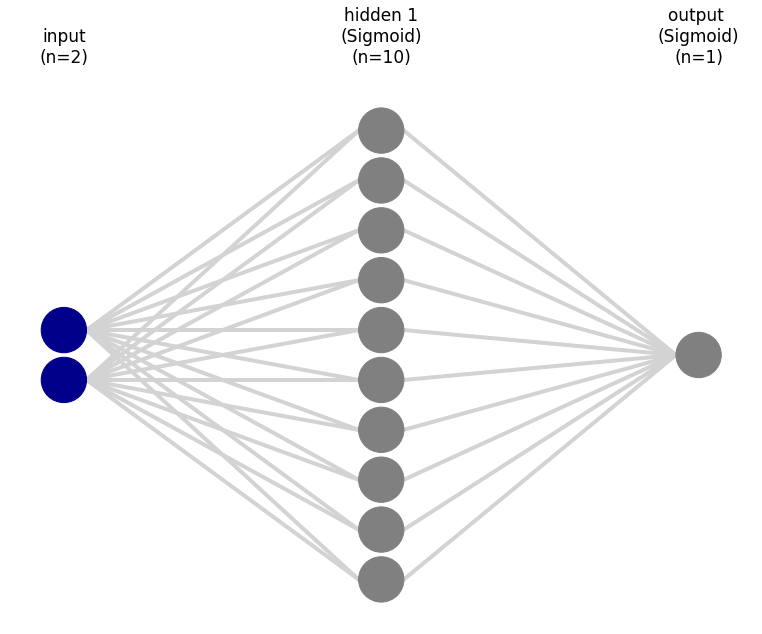

In [75]:
visualize(nInputs, neurons_per_layer, activation_func_names)

## Set the inputs (rows correspond to different set of inputs and columns represent the inputs)

In [76]:
inputs = np.array([[0.,0.,1.,1.],[0.,1.,0.,1.]]).T.astype('float32')
print(inputs)
print(inputs.dtype)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
float32


## Outputs for different logic gates

In [77]:
# AND function
outputAND = np.array([0.,0.,0.,1.])
outputAND = np.asarray([outputAND]).T
# OR function
outputOR = np.array([0.,1.,1.,1.])
outputOR = np.asarray([outputOR]).T
# NAND function
outputNAND = np.array([1.,1.,1.,0.])
outputNAND = np.asarray([outputNAND]).T
# XOR function
outputXOR = np.array([0.,1.,1.,0.])
outputXOR = np.asarray([outputXOR]).T

In [78]:
print('AND outputs\n', outputAND)
print('OR outputs\n', outputOR)
print('XOR outputs\n', outputXOR)
print('NAND outputs\n', outputNAND)

AND outputs
 [[0.]
 [0.]
 [0.]
 [1.]]
OR outputs
 [[0.]
 [1.]
 [1.]
 [1.]]
XOR outputs
 [[0.]
 [1.]
 [1.]
 [0.]]
NAND outputs
 [[1.]
 [1.]
 [1.]
 [0.]]


## Define/ generate initial guess and weights

In [79]:
# Initial guesses for weights
w1 = 0.30
w2 = 0.55
w3 = 0.20
w4 = 0.45
w5 = 0.50
w6 = 0.35
w7 = 0.15
w8 = 0.40
w9 = 0.25

# Initial guesses for biases
b1 = 0.60
b2 = 0.05

# need to use a list instead of a numpy array, since the 
#weight matrices at each layer are not of the same dimensions
weights = [] 
# Weights for layer 1 --> 2
weights.append(np.array([[w1,w4],[w2, w5], [w3, w6]]))
# Weights for layer 2 --> 3
weights.append(np.array([[w7, w8, w9]]))
# List of biases at each layer
biases = []
biases.append(np.array([b1,b1,b1]))
biases.append(np.array([b2]))

weightsOriginal = weights
biasesOriginal = biases

print('Weights matrices: ',weights)
print('Biases: ',biases)

Weights matrices:  [array([[0.3 , 0.45],
       [0.55, 0.5 ],
       [0.2 , 0.35]]), array([[0.15, 0.4 , 0.25]])]
Biases:  [array([0.6, 0.6, 0.6]), array([0.05])]


## Train neural network for AND gate
We will use the Mean Squared Error loss function (MSE_loss)

In [80]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputAND, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.3434138907896084


### Visualize the training loss

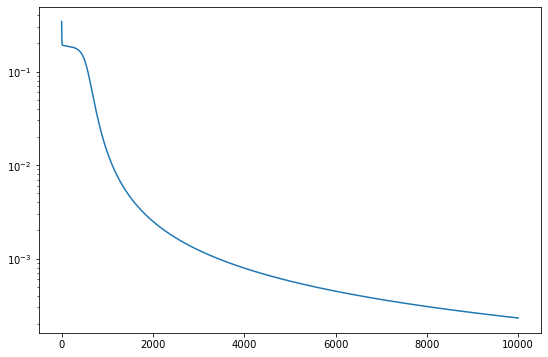

In [81]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [82]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[-0.06778792,  0.05656752],
       [ 3.62657092,  3.656029  ],
       [-1.97129046, -1.93792648]]), array([[-0.30045878,  8.48767361, -4.29360306]])]
Optimized Biases:  [array([ 0.74201331, -5.25315442,  2.58093136]), array([-2.56813668])]


### Make predictions using the optimized weights

In [83]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputAND)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputAND)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.67743595, 0.00520377, 0.92962423],
       [0.68967082, 0.16838376, 0.6554324 ],
       [0.66244865, 0.16429893, 0.64785888],
       [0.67497925, 0.88385417, 0.20944309]]), array([[0.00120635],
       [0.01536264],
       [0.01545407],
       [0.97878617]])]
Inputs at each layer :
  [array([[ 0.74201331, -5.25315442,  2.58093136],
       [ 0.79858083, -1.59712542,  0.64300488],
       [ 0.67422539, -1.6265835 ,  0.6096409 ],
       [ 0.7307929 ,  2.0294455 , -1.32828557]]), array([[-6.71894777],
       [-4.1603345 ],
       [-4.15430842],
       [ 3.83166007]])]
New Average Error with optimized weights:
 0.00023158017727845274
Input:  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Output:  [[0.00120635]
 [0.01536264]
 [0.01545407]
 [0.97878617]]
Expected Output:  [[0.]
 [0.]
 [0.]
 [1.]]


## Train neural network for NAND gate
We will use the Mean Squared Error loss function (MSE_loss)

In [84]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputNAND, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.20379890408215076


### Visualize the training loss

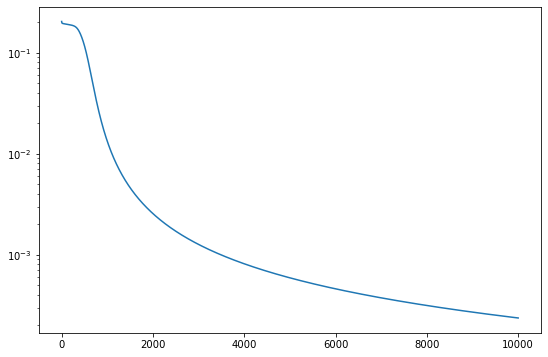

In [85]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [86]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[ 1.30945639,  1.57270365],
       [ 1.20521794,  1.03510894],
       [-3.76155863, -3.68126811]]), array([[-3.46654703, -2.68891187,  8.73862491]])]
Optimized Biases:  [array([-1.42913229, -0.65379534,  5.28759182]), array([0.34611876])]


### Make predictions using the optimized weights

In [87]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputNAND)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputNAND)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.19323392, 0.34213478, 0.9949715 ],
       [0.53583131, 0.59418989, 0.83290036],
       [0.47011668, 0.63446558, 0.82142518],
       [0.81046397, 0.83012756, 0.10384305]]), array([[0.99941946],
       [0.98477259],
       [0.98505825],
       [0.02213769]])]
Inputs at each layer :
  [array([[-1.42913229, -0.65379534,  5.28759182],
       [ 0.14357137,  0.3813136 ,  1.60632372],
       [-0.1196759 ,  0.5514226 ,  1.52603319],
       [ 1.45302776,  1.58653154, -2.15523491]]), array([[ 7.45097674],
       [ 4.16931387],
       [ 4.18854168],
       [-3.78808707]])]
New Average Error with optimized weights:
 0.00023638606611737408
Input:  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Output:  [[0.99941946]
 [0.98477259]
 [0.98505825]
 [0.02213769]]
Expected Output:  [[1.]
 [1.]
 [1.]
 [0.]]


## Train neural network for OR gate
We will use the Mean Squared Error loss function (MSE_loss)

In [88]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputOR, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.18928981997409644


### Visualize the training loss

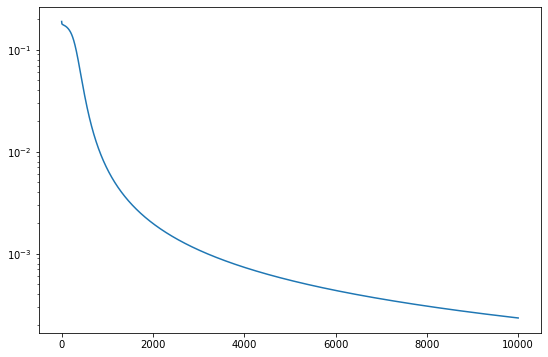

In [89]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [90]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[2.30490019, 2.34416973],
       [4.39174881, 4.3473229 ],
       [2.11485639, 2.16063872]]), array([[2.68763038, 6.87748256, 2.36481151]])]
Optimized Biases:  [array([-1.37621614, -2.35668634, -1.27302976]), array([-5.3504584])]


### Make predictions using the optimized weights

In [91]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputOR)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputOR)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.20161739, 0.08653577, 0.21873905],
       [0.72471142, 0.87981047, 0.7083965 ],
       [0.71680823, 0.88442954, 0.69884979],
       [0.9634857 , 0.99831177, 0.95268538]]), array([[0.02421759],
       [0.98691869],
       [0.98676222],
       [0.99826987]])]
Inputs at each layer :
  [array([[-1.37621614, -2.35668634, -1.27302976],
       [ 0.96795359,  1.99063657,  0.88760896],
       [ 0.92868405,  2.03506248,  0.84182663],
       [ 3.27285378,  6.38238538,  3.00246535]]), array([[-3.69616049],
       [ 4.32340336],
       [ 4.31135394],
       [ 6.35782819]])]
New Average Error with optimized weights:
 0.00023396110659277538
Input:  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Output:  [[0.02421759]
 [0.98691869]
 [0.98676222]
 [0.99826987]]
Expected Output:  [[0.]
 [1.]
 [1.]
 [1.]]


## Train neural network for XOR gate
We will use the Mean Squared Error loss function (MSE_loss)

In [92]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputXOR, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.2727793847802973


### Visualize the training loss

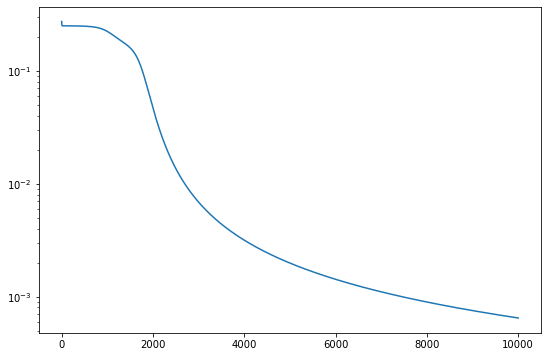

In [93]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [94]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[3.05947207, 3.06374699],
       [6.47442676, 6.49014353],
       [2.82204964, 2.82239255]]), array([[-6.43252328,  9.72357347, -5.97334068]])]
Optimized Biases:  [array([-4.83905742, -2.94189566, -4.48657005]), array([-3.85977779])]


### Make predictions using the optimized weights

In [95]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputXOR)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputXOR)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.00785236, 0.05012095, 0.01113384],
       [0.14488317, 0.97202983, 0.15920201],
       [0.14435434, 0.97159934, 0.15915612],
       [0.78315735, 0.99995562, 0.76094586]]), array([[0.0296142 ],
       [0.97608149],
       [0.97606958],
       [0.02366745]])]
Inputs at each layer :
  [array([[-4.83905742, -2.94189566, -4.48657005],
       [-1.77531044,  3.54824787, -1.6641775 ],
       [-1.77958535,  3.5325311 , -1.66452042],
       [ 1.28416164, 10.02267462,  1.15787213]]), array([[-3.48943981],
       [ 3.70889346],
       [ 3.70838338],
       [-3.71970255]])]
New Average Error with optimized weights:
 0.0006454772762122012
Input:  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Output:  [[0.0296142 ]
 [0.97608149]
 [0.97606958]
 [0.02366745]]
Expected Output:  [[0.]
 [1.]
 [1.]
 [0.]]
